<a href="https://colab.research.google.com/github/leethanhvaan20302/desktop-tutorial/blob/main/HW(n%E1%BB%93i%20c%C6%A1m%20th%C3%B4ng%20minh).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install numpy
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 27.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=4107f462d64772ef960e6a4008c4a83e376b02cf116386e23c0d5dbcd30c1be9
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


627.7777777777777


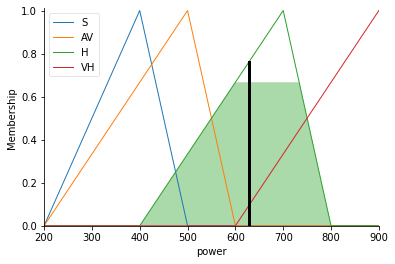

In [5]:
from numpy.ma.core import less
#
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

time=ctrl.Antecedent(np.arange(10,160,10),'Time')
rice=ctrl.Antecedent(np.arange(200,1000,100),'Rice')

power=ctrl.Consequent(np.arange(200,1000,100),'power')
power['S'] = fuzz.trimf(power.universe, [200, 400, 400])
power['AV'] = fuzz.trimf(power.universe, [200, 500, 600])
power['H'] = fuzz.trimf(power.universe, [400, 700, 800])
power['VH'] = fuzz.trimf(power.universe, [600, 900, 1000])

time['VF']=fuzz.trimf(time.universe,[10,25,40])
time['F']=fuzz.trimf(time.universe,[25,40,55])
time['AV']=fuzz.trimf(time.universe,[40,55,70])
time['S']=fuzz.trimf(time.universe,[55,70,85])
time['VL']=fuzz.trimf(time.universe,[85,100,160])

rice['small']=fuzz.trimf(rice.universe,[200, 400, 400])
rice['few']=fuzz.trimf(rice.universe,[200, 500, 600])
rice['normal']=fuzz.trimf(rice.universe,[400, 700, 800])
rice['much']=fuzz.trimf(rice.universe,[600, 900, 1000])

#food.view()     #food['average'].view()
#service.view()
#tip.view()

rule1=ctrl.Rule(time['VF'] & rice['small'],power['S'])
rule2=ctrl.Rule(time['VF']&rice['few'],power['H'])
rule3=ctrl.Rule(time['VF']&rice['normal'],power['H'])
rule4=ctrl.Rule(time['VF']&rice['much'],power['VH'])

rule5=ctrl.Rule(time['F']&rice['small'],power['S'])
rule6=ctrl.Rule(time['F']&rice['few'],power['H'])
rule7=ctrl.Rule(time['F']&rice['normal'],power['H'])
rule8=ctrl.Rule(time['F']&rice['much'],power['VH'])

rule9=ctrl.Rule(time['AV']&rice['small'],power['S'])
rule10=ctrl.Rule(time['AV']&rice['few'],power['AV'])
rule11=ctrl.Rule(time['AV']&rice['normal'],power['H'])
rule12=ctrl.Rule(time['AV']&rice['much'],power['H'])

rule13=ctrl.Rule(time['S']&rice['small'],power['S'])
rule14=ctrl.Rule(time['S']&rice['few'],power['AV'])
rule15=ctrl.Rule(time['S']&rice['normal'],power['H'])
rule16=ctrl.Rule(time['S']&rice['much'],power['H'])

rule17=ctrl.Rule(time['VL']&rice['small'],power['S'])
rule18=ctrl.Rule(time['VL']&rice['few'],power['AV'])
rule19=ctrl.Rule(time['VL']&rice['normal'],power['H'])
rule20=ctrl.Rule(time['VL']&rice['much'],power['H'])


#rule1.view()

powering_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule9,rule10,rule12,rule13,rule14,rule15,rule16,rule17,rule19,rule19,rule20])   # liệt kê ra tất cả các luật
powering=ctrl.ControlSystemSimulation(powering_ctrl)


#Time(phút), Rice(gg)
powering.input['Time']=30   
powering.input['Rice']=500

powering.compute()
print(powering.output['power'])
power.view(sim=powering)

